In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
df=pd.read_csv('Walmart_Store_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info() #looking at the information about the dataset, datatypes of he corresponding columns and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

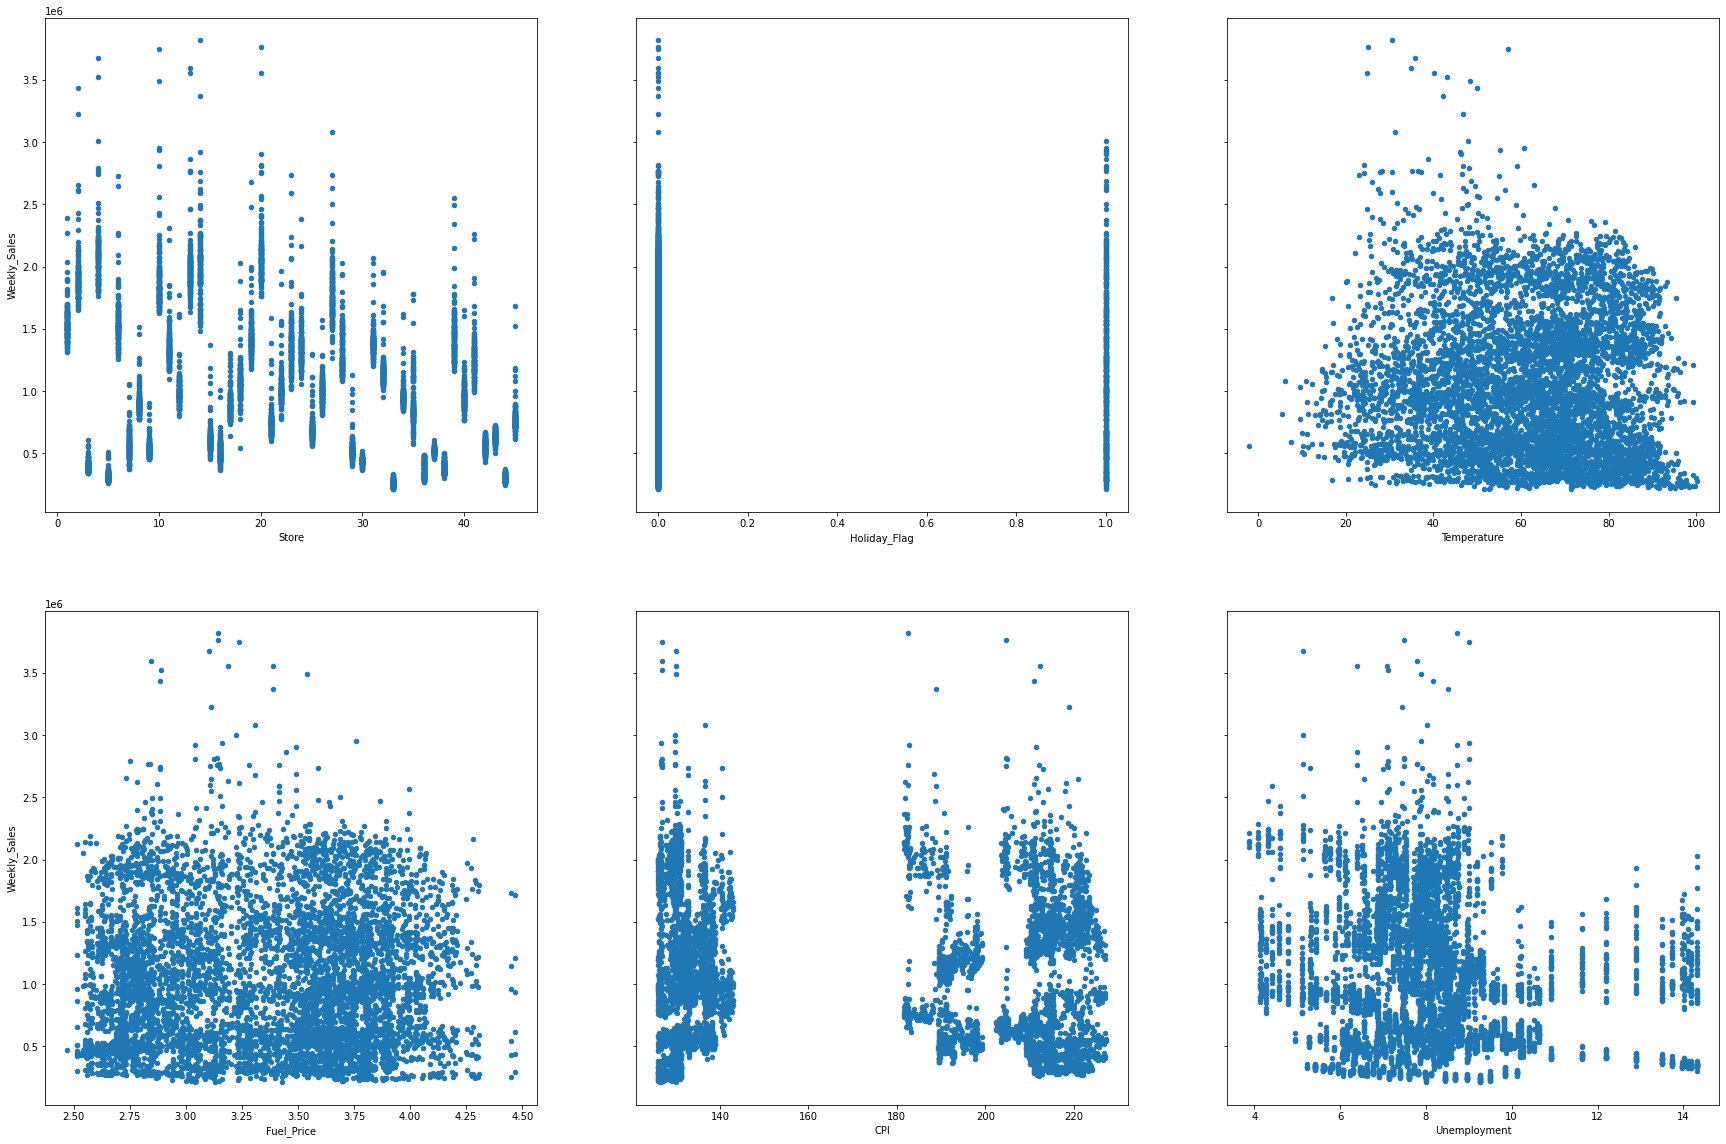

In [4]:
# lets visualize the relationship between sales and features
fig, axs= plt.subplots(2,3,sharey=True,figsize=(30,20))
axe=axs.ravel()
df.plot(kind='scatter',x='Store',y='Weekly_Sales',ax=axe[0])
df.plot(kind='scatter',x='Holiday_Flag',y='Weekly_Sales',ax=axe[1])
df.plot(kind='scatter',x='Temperature',y='Weekly_Sales',ax=axe[2])
df.plot(kind='scatter',x='Fuel_Price',y='Weekly_Sales',ax=axe[3])
df.plot(kind='scatter',x='CPI',y='Weekly_Sales',ax=axe[4])
df.plot(kind='scatter',x='Unemployment',y='Weekly_Sales',ax=axe[5])

From the above diagram we can infer that

1. As the amount of stores increases the avg amount of sales remains same
2. If the tempertature is very less then there is very lesss sale happens
3. Fuel price doesn't affect much on sales
4. If the unemolyment is more then sales are pretty less



In [5]:
df.describe()['Weekly_Sales'][7]

3818686.45

In [6]:
#the store from which he had max sale
df.loc[df['Weekly_Sales']==df.describe()['Weekly_Sales'][7]]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [7]:
g=df.groupby(by='Store')

In [8]:
std_df=g.describe()['Weekly_Sales']
std_df.drop(columns=['min','25%','50%','75%','max'],inplace=True)

In [9]:
#the store which has maximum standard deviation
std_df.loc[std_df['std']==max(std_df['std'])]

,count,mean,std
Store,,,
14,143.0,2.020978e+06,317569.949476


In [10]:
std_df['CoV']=std_df['std']/std_df['mean']

In [11]:
# the co-efficient of mean and std dev
std_df.loc[std_df['std']==max(std_df['std'])]

,count,mean,std,CoV
Store,,,,
14,143.0,2.020978e+06,317569.949476,0.157137


In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df['Quarter']=df['Date'].dt.quarter

In [14]:
quarter=df.groupby(by=['Quarter'])

<AxesSubplot:ylabel='Weekly_Sales'>

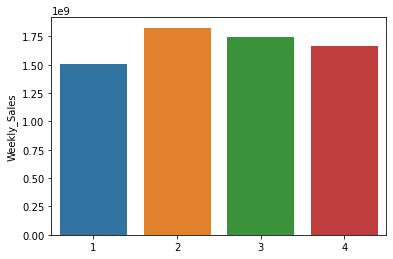

In [15]:
#the quarter which had maximum sales
sns.barplot(x=[1,2,3,4],y=quarter['Weekly_Sales'].sum())

In [16]:
quarter_3=quarter.get_group(3)
quarter_2=quarter.get_group(2)

In [17]:
q3=quarter_3.groupby(by='Store')

In [18]:
q3=q3.describe()['Weekly_Sales']

In [19]:
q3=q3.loc[:,q3.columns== 'mean']

In [20]:
#in quarter 3 whioch store had max sales
q3.loc[q3['mean']== max(q3['mean'])]

,mean
Store,
4,2.038086e+06


In [21]:
quarter_2=quarter_2[['Store','Weekly_Sales']]
quarter_3=quarter_3[['Store','Weekly_Sales']]

In [22]:
quarter_2.reset_index(drop=True,inplace=True)
quarter_3.reset_index(drop=True,inplace=True)

In [23]:
quarter_2=quarter_2.groupby(by='Store').sum()
quarter_3=quarter_3.groupby(by='Store').sum()

In [24]:
quarter_3['Growth']=round(((quarter_3['Weekly_Sales']-quarter_2['Weekly_Sales'])/quarter_2['Weekly_Sales'])*100,2)

In [25]:
quarter_3.sort_values('Growth',ascending=False).head(1)

,Weekly_Sales,Growth
Store,,
7,22278712.18,9.81


In [26]:
quarter_3.sort_values('Growth',ascending=False).tail(1)

,Weekly_Sales,Growth
Store,,
28,47950005.8,-8.46


In [27]:
Super_Bowl= ['12-Feb-2010', '11-Feb-2011', '10-Feb-2012', '8-Feb-2013']
Labour_Day= ["10-Sep-2010", "9-Sep-2011", "7-Sep-2012","6-Sep-2013"]
Thanksgiving=[ "26-Nov-2010", "25-Nov-2011","23-Nov-2012", "29-Nov-2013"]
Christmas= ["31-Dec-2010", "30-Dec-2011", "28-Dec-2012", "27-Dec-2013"]

In [52]:
import datetime as dt
x=[]
for i in range(len(Super_Bowl)):
    x.append(dt.datetime.strptime(Super_Bowl[i],'%d-%b-%Y'))


In [72]:
time=df['Date']

In [82]:
SUperbowl_hol=[]
for i in range(len(time)):
    if Thanksgiving==time[i].strftime('%d-%b-%Y'):
        print(time[i])
        SUperbowl_hol.append(time[i])

In [86]:
christmas1= pd.Timestamp(date(2010,12,31))
christmas2=pd.Timestamp(date(2011,12,30))
christmas3=pd.Timestamp(date(2012,12,28))
christmas4=pd.Timestamp(date(2013,12,27))


Thanksgiving1= pd.Timestamp(date(2010,11,26))
Thanksgiving2= pd.Timestamp(date(2011,11,25))
Thanksgiving3=pd.Timestamp(date(2012,11,23))
Thanksgiving4=pd.Timestamp(date(2013,11,29))

Labour_Day1=pd.Timestamp(date(2010,2,10))
Labour_Day2=pd.Timestamp(date(2011,2,9))
Labour_Day3=pd.Timestamp(date(2012,2,7))
Labour_Day4=pd.Timestamp(date(2013,2,6))

Super_Bowl1= pd.Timestamp(date(2010,9,12))
Super_Bowl2= pd.Timestamp(date(2011,9,11))
Super_Bowl3=pd.Timestamp(date(2012,9,10))
Super_Bowl4=pd.Timestamp(date(2013,9,8))



In [91]:
#calculating the mean sales during holidays

chistmas_data= df[(df['Date'] == christmas1) | (df['Date'] == christmas2) | (df['Date'] == christmas3) | (df['Date'] == christmas4)]
Thanksgiving_data= df[(df['Date'] == Thanksgiving1) | (df['Date'] == Thanksgiving2) | (df['Date'] == Thanksgiving3) | (df['Date'] == Thanksgiving4)]
Labour_Day_data= df[(df['Date'] == Labour_Day1) | (df['Date'] == Labour_Day2) | (df['Date'] == Labour_Day3) | (df['Date'] == Labour_Day4)]
Super_Bowl_data= df[(df['Date'] == Super_Bowl1) | (df['Date'] == Super_Bowl2) | (df['Date'] == Super_Bowl3) | (df['Date'] == Super_Bowl4)]

In [101]:
print("The total sale in Christmas sale is ",chistmas_data['Weekly_Sales'].mean())
print("The total sale in Thanksgiving Day is ",Thanksgiving_data['Weekly_Sales'].mean())
print("The total sale in Labour day is ",Labour_Day_data['Weekly_Sales'].mean())
print("The total sale in Super Bowl is ",Super_Bowl_data['Weekly_Sales'].mean())

The total sale in Christmas sale is  960833.1115555551
The total sale in Thanksgiving Day is  1471273.427777778
The total sale in Labour day is  1008369.406
The total sale in Super Bowl is  nan


In [106]:
Non_Holiday=df[df['Holiday_Flag']==0]

In [107]:
Non_Holiday['Weekly_Sales'].mean()

1041256.3802088564

In [1]:
# this shows that in thanksgiving day the amputn of sales was high compared to other days